In [13]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import itertools



# Métodos de avaliação do scikit-learn (http://scikit-learn.org/stable/modules/model_evaluation.html)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title="Matriz de confusão",
                          cmap=plt.cm.Blues):
    """
    Esta função plota a matriz de confusão.
    Normalização pode ser feita usando o parâmetro 'normalize=True'.
    O mapa de cores pode ser alterado pelo parâmetro cmap. Default: 'cmap=plt.cm.Blues'.
    O parâmetro 'title' altera o título.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=30)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusão normalizada")
    else:
        print("Matriz de confusão sem normalização")

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Classe real')
    plt.xlabel('Classe prevista')


In [14]:


# importa a base de dados iris
iris = datasets.load_iris()

X, y = iris.data, iris.target
class_names = iris.target_names

# Particiona a base de dados
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Instancia um classificador SVM (Support Vector Machine)
classificador = svm.SVC(probability=True, random_state=0)

# Avalia o modelo usando validação cruzada e a mediga de Log-loss.
# A validação cruzada divide a base em K=3 partes e desta cada uma dessas
# parte frente ao restante usado no treinamento.
print("cross_val_score(clf, X, y, scoring='neg_log_loss'): ",
          cross_val_score(classificador, X, y, scoring='neg_log_loss'))
print("\n---------------------------------------------------------------\n")

cross_val_score(clf, X, y, scoring='neg_log_loss'):  [-0.13 -0.07 -0.18 -0.12 -0.06]

---------------------------------------------------------------



In [15]:

# Executa um classificador SVM. Propositalmente escolheu-se C bem baixo
# para analisar o impacto nos resultados. (mmodelo exgeradamente regulariado)

classificador = svm.SVC(kernel='linear', C=0.01)
y_pred = classificador.fit(X_train, y_train).predict(X_test)
print("\nClassificado usando SVM com C=0.01 (muito baixo)")
print(classification_report(y_test, y_pred, target_names=class_names))


Classificado usando SVM com C=0.01 (muito baixo)
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.62      0.77        16
   virginica       0.60      1.00      0.75         9

    accuracy                           0.84        38
   macro avg       0.87      0.88      0.84        38
weighted avg       0.91      0.84      0.84        38



Matriz de confusão sem normalização
[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]


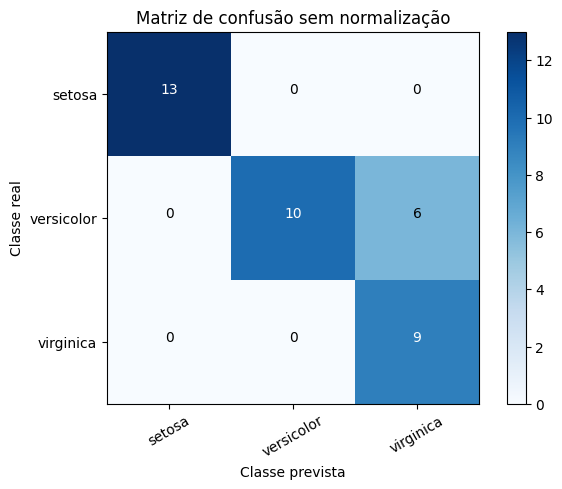

In [16]:
# Calcula a matriz de confusão
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Matriz de confusão sem normalização')

plt.show()

Matriz de confusão normalizada
[[1.   0.   0.  ]
 [0.   0.62 0.38]
 [0.   0.   1.  ]]


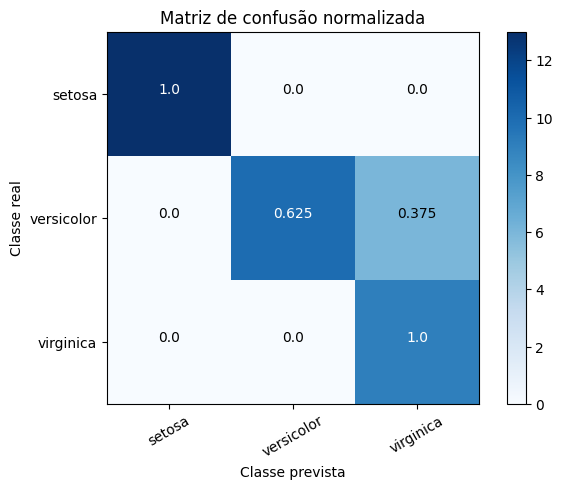

In [17]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Matriz de confusão normalizada')

plt.show()

In [18]:
# Usa o método de busca em grade para variar o parâmetro C de 1 a 10 na
# tentativa de enocntrar o melhor classificador. baseado na minha medida de
# desempenho.
svr = svm.SVC()
params={'kernel':('linear', 'rbf'), 'C':[1, 10]}
classificadorGrid = GridSearchCV(svr, param_grid=params)


y_pred = classificadorGrid.fit(X_train, y_train).predict(X_test)
print("\nClassificado usando SVM com GridSearch")
print("Best parameters set found on development set:")
print(classificadorGrid.best_params_,'\n')

print(classification_report(y_test, y_pred, target_names=class_names))


Classificado usando SVM com GridSearch
Best parameters set found on development set:
{'C': 1, 'kernel': 'linear'} 

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



Matriz de confusão normalizada
[[1.   0.   0.  ]
 [0.   0.94 0.06]
 [0.   0.   1.  ]]


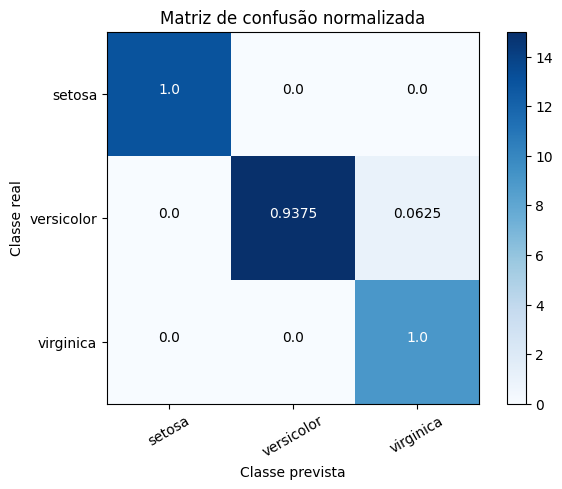

In [19]:
# Calcula a matriz de confusão
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Matriz de confusão normalizada')

plt.show()
